## SYRIATEL CUSTOMER CHURN PROJECT

## BUSINESS UNDERSTANDING  

### Primary objective of the project
- Predict whether a customer will 'soon' stop doing business with SyriaTel, a telecommunications company-by identifying customers likely to churn.Here,can take proactive measures to retain them, thus reducing revenue loss and maintaining a stable customer base.

### Other objectives might be
- Are there specific services or behaviors that correlate with customer dissatisfaction?
- What patterns in customer behavior are associated with higher churn rates?
- Plausible reasons for churn to happen

The project’s success will be determined by the ability to accurately predict customer churn. Key metrics for evaluation could include accuracy, precision, recall, F1 score, and the reduction in actual churn after implementing intervention strategies based on the model's predictions.

## DATA UNDERSTANDING

The data contains the following variables.
- state, string. 2-letter code of the US state of customer residence
- account_length, numerical. Number of months the customer has been with the current telco provider
- area_code, string="area_code_AAA" where AAA = 3 digit area code.
- international_plan, (yes/no). The customer has international plan.
- voice_mail_plan, (yes/no). The customer has voice mail plan.
- number_vmail_messages, numerical. Number of voice-mail messages.
- total_day_minutes, numerical. Total minutes of day calls.
- total_day_calls, numerical. Total number of day calls.
- total_day_charge, numerical. Total charge of day calls.
- total_eve_minutes, numerical. Total minutes of evening calls.
- total_eve_calls, numerical. Total number of evening calls.
- total_eve_charge, numerical. Total charge of evening calls.
- total_night_minutes, numerical. Total minutes of night calls.
- total_night_calls, numerical. Total number of night calls.
- total_night_charge, numerical. Total charge of night calls.
- total_intl_minutes, numerical. Total minutes of international calls.
- total_intl_calls, numerical. Total number of international calls.
- total_intl_charge, numerical. Total charge of international calls
- number_customer_service_calls, numerical. Number of calls to customer service
- churn, (yes/no). Customer churn - target variable.

## DATA PREPARATION

In [3]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LogisticRegression
import warnings  
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [4]:
#set up visualizations
sns.set(style='whitegrid')
plt.style.use('fivethirtyeight')

In [5]:
#load the data and view the first five rows
data = pd.read_csv('SyriaTel.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#view the number of columns and rows
data.shape

(3333, 21)

In [7]:
#view the columns and the type of data structure it has
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
#lookup for any missing values of the data
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
#check for any duplicates of the data
data.duplicated().sum()

0

In [10]:
data.drop(['phone number','state','area code'],axis=1,inplace=True)
data.head(2)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [11]:
df=pd.DataFrame(data)
columns_to_convert = ['international plan','voice mail plan']
df[columns_to_convert] = df[columns_to_convert].replace({'yes':1,'no':0})
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
#view categorical columns
df_cat = data.select_dtypes(exclude =['number'])
df_cat.head()

,international plan,voice mail plan,churn
0,no,yes,False
1,no,yes,False
2,no,no,False
3,yes,no,False
4,yes,no,False


In [13]:
#change our churn column into an integer
df['churn'] = df['churn'].replace(['True', 'False'], ['1', '0']).astype(int)
df['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

[]

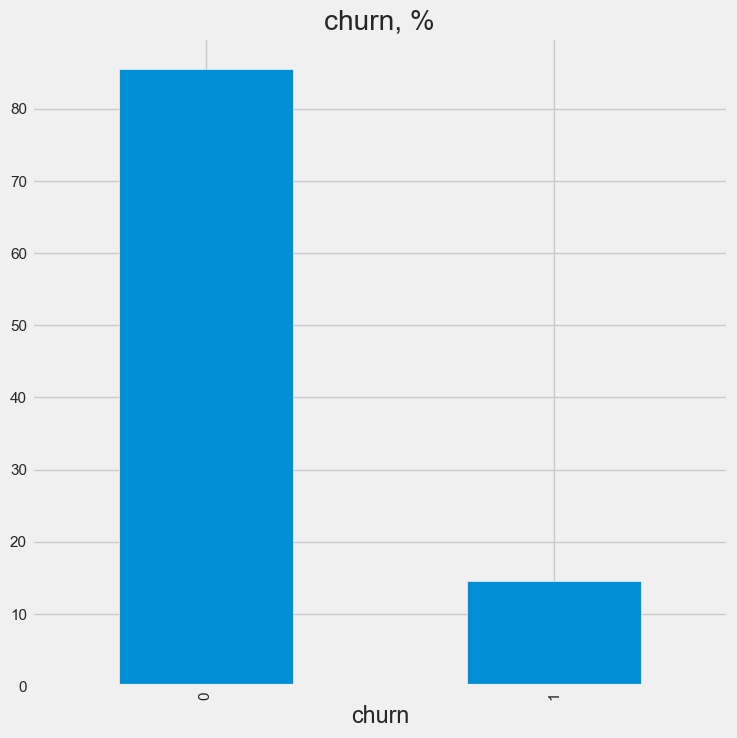

In [38]:
#visualizing the churn column
fig, ax = plt.subplots(figsize=(8, 8))
churn_dist = df['churn'].value_counts(normalize=True) * 100
ax = churn_dist.plot(kind='bar')
ax.set_xlabel('churn')
ax.set_title('churn, %')
plt.plot()

## MODELLING

### Logistic regression ensembled

In [31]:
#Bagging ensemble logistic regression model
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, accuracy_score
baggingLogReg = BaggingClassifier(LogisticRegression(), n_estimators=20, max_samples=0.7, max_features=0.7, random_state=5)
baggingLogReg.fit(X_train, y_train)
y_pred = baggingLogReg.predict(X_test)

print('f1 score:', f1_score(y_pred, y_test, average='macro'))
print('recall:', recall_score(y_pred, y_test, average='macro'))
print('accuracy:', accuracy_score(y_pred, y_test))


C:\Users\HP\anaconda3\anaconda\envs\learn-env\Lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


f1 score: 0.4614970382337103
recall: 0.4285
accuracy: 0.857


C:\Users\HP\anaconda3\anaconda\envs\learn-env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
baggingLogReg_grid = GridSearchCV(baggingLogReg, {'n_estimators': [10, 20, 30, 40, 60, 80, 100]},cv=5,scoring='f1_macro', n_jobs=-1)
baggingLogReg_grid.fit(X_train, y_train)

C:\Users\HP\anaconda3\anaconda\envs\learn-env\Lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=LogisticRegression(),
                                         max_features=0.7, max_samples=0.7,
                                         n_estimators=20, random_state=5),
             n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 30, 40, 60, 80, 100]},
             scoring='f1_macro')

### DECISION TREE

In [19]:
#import necessary libraries
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [20]:
X = df[['international plan','voice mail plan']]
y = df[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
#Encoding our data
ohe=OneHotEncoder()
ohe.fit(X_train)
X_train_ohe=ohe.transform(X_train).toarray()
ohe_df=pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(X_train.columns))
ohe_df.head()

,international plan_0,international plan_1,voice mail plan_0,voice mail plan_1
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0


In [22]:
#train the decision tree
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy')

<function matplotlib.pyplot.show(close=None, block=None)>

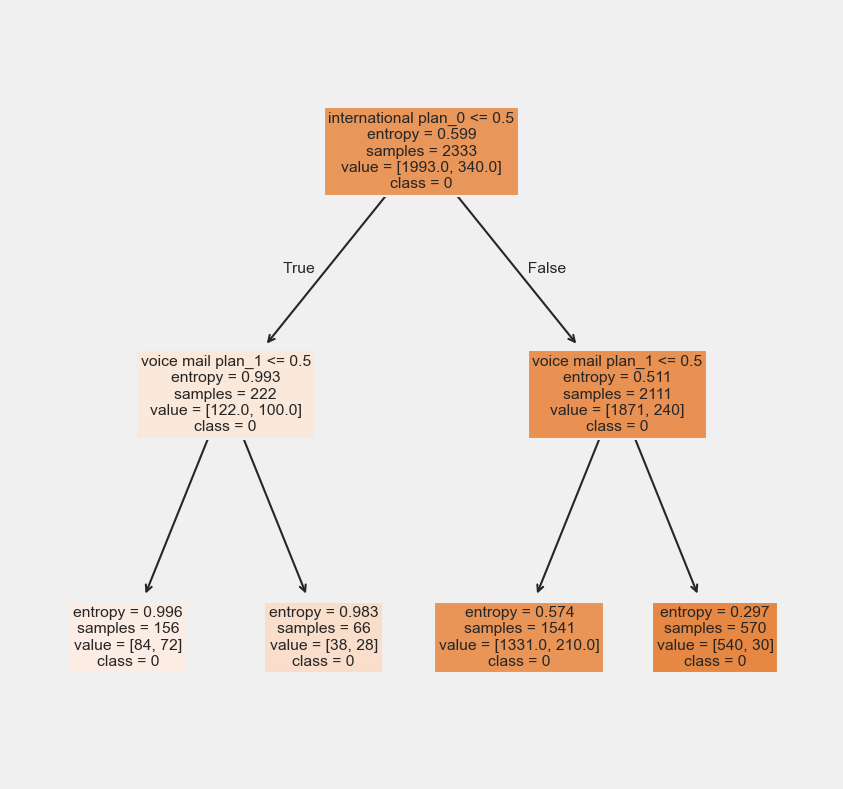

In [23]:
#plot the decision tree
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(3,3), dpi=300)
tree.plot_tree(clf,
               feature_names=ohe_df.columns,
               class_names=np.unique(y).astype('str'),
               filled=True)
plt.show
               

In [24]:
#evaluate the predictive perfomance
X_test_ohe=ohe.transform(X_test)
y_preds=clf.predict(X_test_ohe)
print('Accuracy:',accuracy_score (y_test,y_preds))

Accuracy: 0.857


In [25]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_preds)
cm

array([[857,   0],
       [143,   0]], dtype=int64)

From the confusion matrix above we see that there are 857 correct predictions while 143 incorrect predictions.Thus we can conclude that Decision Tree Classifier made a good prediction.   

## EVALUATION 